# Classification with Decision Tree Classifier


## Import related module

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Preparing Data

In [5]:
col_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
iris = pd.read_csv("iris.data", header = None, names = col_names)
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Set feature and target variable

In [7]:
feature_cols = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = iris[feature_cols] # Features
y = iris['class'] # Target variable

## Split train-test data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Creating Model

In [9]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

## Make Prediction

In [10]:
y_pred = clf.predict(X_test)

## Displaying accuracy

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Accuracy: 0.9555555555555556


## Visualize Decission Tree Model

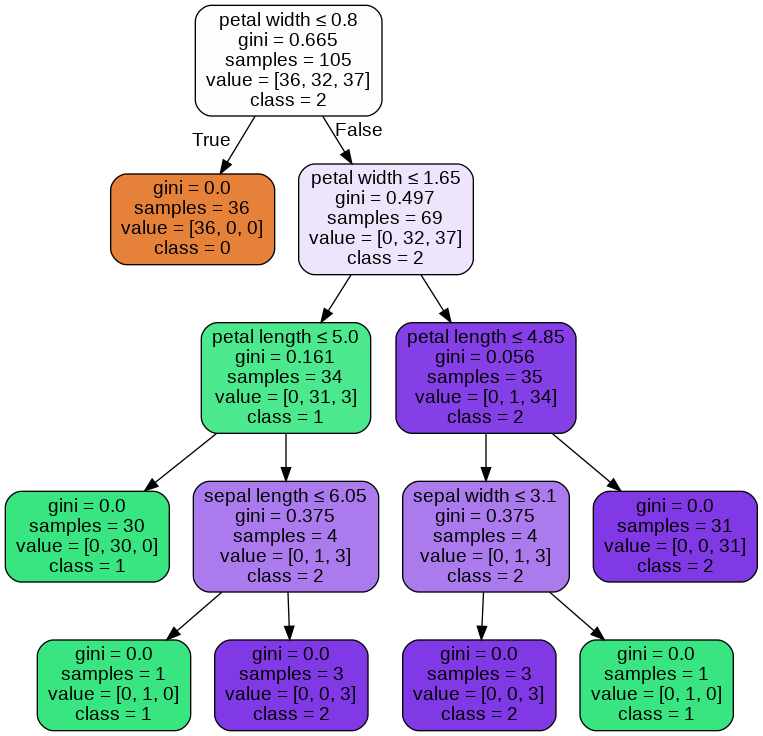

In [15]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_cols, class_names=['0','1','2'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Iris_Tree.png')
Image(graph.create_png())